Observation: The GMM using EM algorithm based clustering matched the true labels than the KMeans


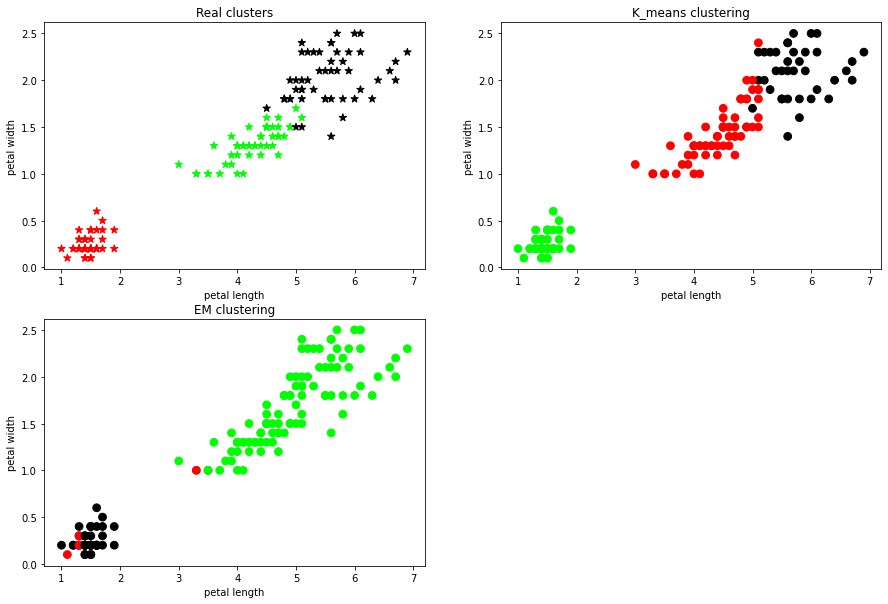

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
%matplotlib inline

iris=datasets.load_iris()
X=pd.DataFrame(iris.data)
X.columns=['sepal_length','sepal_width','petal_length','petal_width']
Y=pd.DataFrame(iris.target)
Y.columns=['Targets']
model=KMeans(n_clusters=3)
model.fit(X)

plt.figure(figsize=(15,10))
colormap=np.array(['red','lime','black'])
plt.subplot(2,2,1)
plt.scatter(X.petal_length,X.petal_width,c=colormap[Y.Targets],s=60,marker='*')
plt.title('Real clusters')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.subplot(2,2,2)
plt.scatter(X.petal_length,X.petal_width,c=colormap[model.labels_],s=60)
plt.title('K_means clustering')
plt.xlabel('petal length')
plt.ylabel('petal width')
scales=preprocessing.StandardScaler()
scales.fit(X)
xsa=scales.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y=gmm.predict(xs)
plt.subplot(2,2,3)
colorm=np.array(['red','lime','black'])
plt.scatter(X.petal_length,X.petal_width, c=colorm[gmm_y],s=60)
plt.title('EM clustering')
plt.xlabel('petal length')
plt.ylabel('petal width')
print('Observation: The GMM using EM algorithm based clustering matched the true labels than the KMeans')